# Bayesian Methods for Hackers - Chapter 1

This notebook looks at Bayesian symbols and definitions and a script for modeling the probability of buggy code

Our references:

* [Bayesian Methods for Hackers, by Cam Davidson Pilon](https://dataorigami.net/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/)

* [Bayesian Methods for Hackers - Github](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers)

* [Google Colab](https://colab.research.google.com/)

* [ArviZ: Version 0.17.0](https://python.arviz.org/en/stable/)

* [IPython: Version 4.0](https://ipython.org/)

* [Matplotlib: Version 3.8](https://matplotlib.org/)

* [Numpy Version: 1.26](https://numpy.org/)

* [Pandas Version: 2.2.0](https://pandas.pydata.org/)

* [Python Version 3.12.1](https://www.python.org/)

* [SciPy: Version 1.12.0](https://scipy.org/)



Bayesian inference is about updating our beliefs after considering new evidence


Bayes' Theorem Variables: symbols, definitions, & term names

* P(A|X), the probability of A given the evidence X, an updated belief, aka the **posterior probability**

* P(X|A), the probability of X given the evidence A, aka the **likelihood**

* P(A) our belief about the probability of event A, aka the **prior**

* P(X) our belief about the proability of event X, aka the **total probability**

Bayes' Theorem Equation

$$P(A|X) = \frac{P(X|A)P(A)}{P(X)}$$

Rewriting Bayes' theorem equation with term names yields:

$$(Posterior Probability) = \frac{(Likelihood)~(Prior)}{(Total Probability)}$$

Where the term names are:

-  **Posterior Probability** is the probability of the hypothesis after we see the data

-  **Likelihood** is the probability of the data under the hypothesis

-  **Prior** is the probability of the hypothesis before we see the data

-  **Total Probability** of the data under any hypothesis

Let's look at how to model the probability of buggy code and **assuming** your code can pass bug tests

**Events**

Your code either has bugs in it or it doesn't and yet your code can still pass bug tests

* A = code has no bugs
* ~ A = code has bugs
* X = code passes bug tests


**Probabilities**

* P(X|A) = 1 = Code passes bug tests due to absence of bugs
* P(A) = p = Code does not have bugs
* P(~ A) = 1 - p = Code has bugs (i.e. 80% no bugs = 1 - 0.8 = 0.2 bugs)
* P(X) = P(X and A) + P(X and ~ A) = code passes bug tests (without and with bugs)
* P(X) = P(X|A)P(A) + P(X| ~A)P( ~A) = code passes bug tests (without and with bugs)

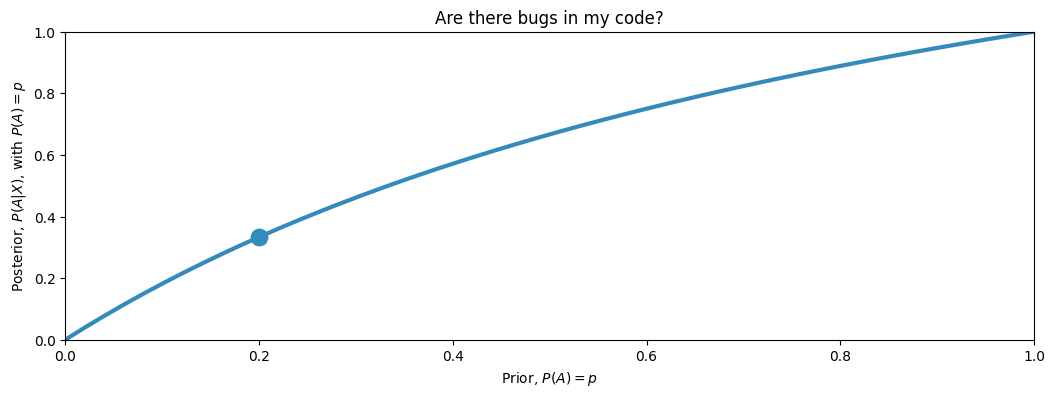

In [1]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt

import scipy.stats as stats

figsize(12.5, 4)
p = np.linspace(0, 1, 50)
plt.plot(p, 2*p/(1+p), color="#348ABD", lw=3)
#plt.fill_between(p, 2*p/(1+p), alpha=.5, facecolor=["#A60628"])
plt.scatter(0.2, 2*(0.2)/1.2, s=140, c="#348ABD")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Prior, $P(A) = p$")
plt.ylabel("Posterior, $P(A|X)$, with $P(A) = p$")
plt.title("Are there bugs in my code?");